# Cascade size phase diagrams

Below we investigate the spreading of the news in a network depending on different model parameters. 

The considered parameters for the agent are
* threshold
* independence

For the news we looked at the
* sensation
* decay parameter
* number of initial agents

The measure of the spreading is the cascade size $C$ which is defined as

$$ C = \# \text{active agents} / \#\text{total agents} .$$

Below we vary two parameters simulationeously and create heatmaps of the cascade size. We expect that the plots will look similar to a phase diagram, i.e. we expect regions with high cascade size and regions with low cascade size with a sharp transition. The parameters which are not considered in the experiment are either chosen uniformly at random or neglected.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

Import model classes and utility functions

In [2]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname(os.path.abspath(''))))

In [3]:
from classes.agent import AgentState
from classes.news import News
from classes.utils import create_graph, construct_world, construct_world_constant_parameters

## Threshold vs Sensation
Here we vary the activation threshold of the agents and the sensation of the news.

#### Setup
* threshold: variation parameter, the same for all agents
* independence: chosen uniformly at random
* sensation: variation parameter
* decay parameters: negelected (set to 0)

In the report the experiment was done with 1000 agents, 50 samples and 15 initial agents.

In [4]:
def threshold_sensation_map(thresholds, sensations, num_agents=100, num_samples=10, initial_agents=5):
    df = pd.DataFrame(columns=['Threshold', 'Sensation', 'number active'])
    
    print(f'Starting simulation with {num_agents} agents (this may take some time...)')    
    for threshold in thresholds:
        for sensation in sensations:
            samples = []
            for _ in range(num_samples):
                # Prepare world
                name_news = 1
                news = {name_news: News(name_news, sensation, decay_parameter=0.0)}
                
                agent_names = list(range(num_agents))
                agent_threshold = [threshold] * num_agents
                agent_independence = np.random.random(num_agents)
                
                world = construct_world(agent_names, agent_threshold, agent_independence, news)
                
                # Activate random agent
                initial_agent_names = np.random.choice(agent_names, initial_agents, replace=False)
                for agent_name in initial_agent_names:
                    world.agents[agent_name].states[name_news] = AgentState.ACTIVE
                
                # Update world until convergences
                number_active, _, _ = world.full_dynamics()

                samples.append(number_active / num_agents)
                
            df_active = pd.DataFrame([[threshold, sensation, np.mean(samples)]], columns=df.columns)
            df = df.append(df_active, ignore_index=True)
            
    print('Simulation completed!!!')
            
    return df.astype(float).pivot('Sensation', 'Threshold', 'number active')

In [5]:
thresholds = np.linspace(0.0, 1.0, 21)
sensation = np.linspace(0.0, 1.0, 21)

cascade_size_ts = threshold_sensation_map(thresholds, sensation, num_agents=100, num_samples=10, initial_agents=3)

Starting simulation with 100 agents (this may take some time...)
Simulation completed!!!


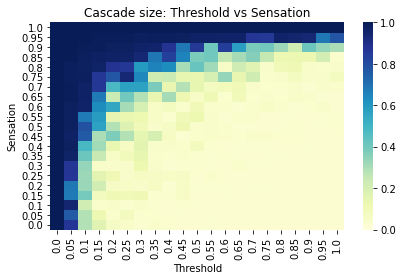

In [6]:
ax = sns.heatmap(
    cascade_size_ts,
    cmap='YlGnBu',
    vmin=0.0,
    vmax=1.0,
    xticklabels=np.float32(thresholds),
    yticklabels=np.float32(sensation))
ax.invert_yaxis()

plt.title('Cascade size: Threshold vs Sensation')
plt.tight_layout()

## Independence vs Sensation
Here we vary the independence of the agents and the sensation of the news.

#### Setup
* threshold: chosen uniformly at random
* independence: variation parameter, the same for all agents
* sensation: variation parameter
* decay parameters: negelected (set to 0)

In the report the experiment was done with 1000 agents, 50 samples and 15 initial agents.

In [7]:
def independence_sensation_map(independences, sensations, num_agents=100, num_samples=10, initial_agents=5):
    df = pd.DataFrame(columns=['independence', 'sensation', 'number active'])
    
    print(f'Starting simulation with {num_agents} agents (this may take some time...)')    
    for independence in independences:
        for sensation in sensations:
            samples = []
            for _ in range(num_samples):
                # Prepare world
                name_news = 1
                news = {name_news: News(name_news, sensation, decay_parameter=0.0)}
                
                agent_names = list(range(num_agents))
                agent_threshold = np.random.random(num_agents)
                agent_independence = [independence] * num_agents
                
                world = construct_world(agent_names, agent_threshold, agent_independence, news)
                
                # Activate random agent
                initial_agent_names = np.random.choice(agent_names, initial_agents, replace=False)
                for agent_name in initial_agent_names:
                    world.agents[agent_name].states[name_news] = AgentState.ACTIVE
                
                # Update world until convergences
                number_active, _, _ = world.full_dynamics()

                samples.append(number_active / num_agents)
                
            df_active = pd.DataFrame([[independence, sensation, np.mean(samples)]], columns=df.columns)
            df = df.append(df_active, ignore_index=True)
            
    print('Simulation completed!!!')
            
    return df.astype(float).pivot('sensation', 'independence', 'number active')

In [8]:
independence = np.linspace(0.0, 1.0, 21)
sensation = np.linspace(0.0, 1.0, 21)

cascade_size_is = independence_sensation_map(independence, sensation, num_agents=100, num_samples=10, initial_agents=3)

Starting simulation with 100 agents (this may take some time...)
Simulation completed!!!


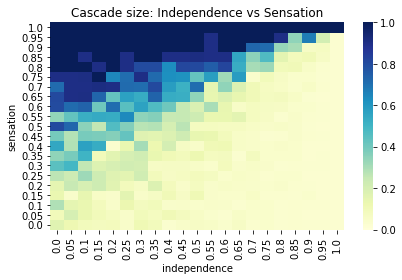

In [9]:
ax = sns.heatmap(
    cascade_size_is,
    cmap='YlGnBu',
    vmin=0.0,
    vmax=1.0,
    xticklabels=np.float32(independence),
    yticklabels=np.float32(sensation))
ax.invert_yaxis()

plt.title('Cascade size: Independence vs Sensation')
plt.tight_layout()

## Decay parameter vs Sensation
Here we vary the independence of the agents and the sensation of the news.

#### Setup
* threshold: chosen uniformly at random
* independence: chosen uniformly at random
* sensation: variation parameter
* decay parameters: variation parameter

In the report the experiment was done with 1000 agents, 50 samples and 15 initial agents.

In [10]:
def decay_sensation_map(decay_parameters, sensations, num_agents=100, num_samples=10, initial_agents=5):
    df = pd.DataFrame(columns=['decay parameter', 'sensation', 'number active'])
    
    print(f'Starting simulation with {num_agents} agents (this may take some time...)')    
    for decay_parameter in decay_parameters:
        for sensation in sensations:
            samples = []
            for _ in range(num_samples):
                # Prepare world
                name_news = 1
                news = {name_news: News(name_news, sensation, decay_parameter)}
                
                agent_names = list(range(num_agents))
                agent_threshold = np.random.random(num_agents)
                agent_independence = np.random.random(num_agents)
                
                world = construct_world(agent_names, agent_threshold, agent_independence, news)
                
                # Activate random agent
                initial_agent_names = np.random.choice(agent_names, initial_agents, replace=False)
                for agent_name in initial_agent_names:
                    world.agents[agent_name].states[name_news] = AgentState.ACTIVE
                
                # Update world until convergences
                number_active, _, _ = world.full_dynamics()

                samples.append(number_active / num_agents)
                
            df_active = pd.DataFrame([[decay_parameter, sensation, np.mean(samples)]], columns=df.columns)
            df = df.append(df_active, ignore_index=True)
            
    print('Simulation completed!!!')
            
    return df.astype(float).pivot('sensation', 'decay parameter', 'number active')

In [11]:
decay_parameters = np.logspace(-5, 2, 15)
sensation = np.linspace(0.0, 1.0, 21)

cascade_size_ds = decay_sensation_map(decay_parameters, sensation, num_agents=100, num_samples=10, initial_agents=3)

Starting simulation with 100 agents (this may take some time...)
Simulation completed!!!


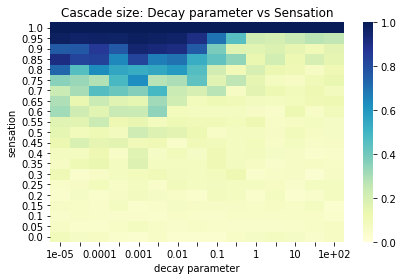

In [12]:
ax = sns.heatmap(
    cascade_size_ds,
    cmap='YlGnBu',
    vmin=0.0,
    vmax=1.0,
    xticklabels=[f'{nmb:.2g}' if not idx % 2 else '' for idx, nmb in enumerate(np.float32(decay_parameters))],
    yticklabels=np.float32(sensation))
ax.invert_yaxis()

plt.title('Cascade size: Decay parameter vs Sensation')
plt.tight_layout()

### Threshold vs Independence
Here we vary the independence of the agents and the sensation of the news.
Setup

* threshold: variation parameter
* independence: variation parameter
* sensation: set to 0.8.
* decay parameters: negelected (set to 0)

In the report the experiment was done with 1000 agents, 50 samples and 15 initial agents.

In [13]:
def threshold_independence_map(thresholds, independences, num_agents=100, num_samples=10, sensation=0.8, initial_agents=5):
    df = pd.DataFrame(columns=['threshold', 'independence', 'number active'])
    
    print(f'Starting simulation with {num_agents} agents (this may take some time...)')    
    for threshold in thresholds:
        for independence in independences:
            samples = []
            for _ in range(num_samples):
                # Prepare world
                name_news = 1
                news = {name_news: News(name_news, sensation, decay_parameter=0.0)}
                
                world = construct_world_constant_parameters(num_agents, threshold, independence, news)
                agent_names = list(world.agents.keys())
                
                # Activate random agent
                initial_agent_names = np.random.choice(agent_names, initial_agents, replace=False)
                for agent_name in initial_agent_names:
                    world.agents[agent_name].states[name_news] = AgentState.ACTIVE
                
                # Update world until convergences
                number_active, _, _ = world.full_dynamics()

                samples.append(number_active / num_agents)
                
            df_active = pd.DataFrame([[threshold, independence, np.mean(samples)]], columns=df.columns)
            df = df.append(df_active, ignore_index=True)
            
    print('Simulation completed!!!')
            
    return df.astype(float).pivot('independence', 'threshold', 'number active')

In [14]:
thresholds = np.linspace(0.0, 1.0, 21)
independences = np.linspace(0.0, 1.0, 21)

cascade_size_ti = threshold_independence_map(thresholds, independences, num_agents=100, num_samples=10, initial_agents=3)

Starting simulation with 100 agents (this may take some time...)
Simulation completed!!!


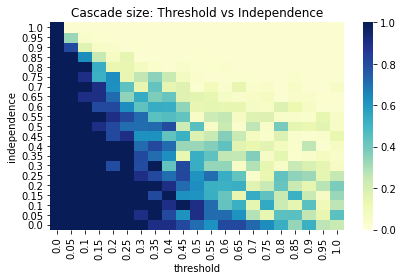

In [15]:
ax = sns.heatmap(
    cascade_size_ti,
    cmap='YlGnBu',
    vmin=0.0,
    vmax=1.0,
    xticklabels=np.float32(thresholds),
    yticklabels=np.float32(independences))
ax.invert_yaxis()

plt.title('Cascade size: Threshold vs Independence')
plt.tight_layout()

### Number initial agents vs Sensation
Here we look at the number of initial agents and the sensation of the news.

* threshold: chosen uniformly at random
* independence: chosen uniformly at random
* sensation: variation parameter
* decay parameters: negelected (set to 0)

In the first experiment the initial agents are chosen at random.
In the second experiment the initial agents are chosen according to the number of receivers they have.

In the report the experiments were done with 1000 agents and 50 samples.

##### Random

In [16]:
def initial_agents_random(initial_agents, sensations, num_agents=100, num_samples=10):    
    df = pd.DataFrame(columns=['number initial agents', 'sensation', 'number active'])
    
    print(f'Starting simulation with {num_agents} agents (this may take some time...)')  
    for initial in initial_agents:
        for s in sensations:
            samples = []
            for _ in range(num_samples):
                name_news = 1
                news = {name_news: News(name_news, s, decay_parameter=0.0)}
                
                agent_names = list(range(num_agents))
                thresholds = np.random.random(num_agents)
                independences = np.random.random(num_agents)
                
                world = construct_world(agent_names, thresholds, independences, news)

                initial_agent_names = np.random.choice(agent_names, int(initial), replace=False)
                for agent_name in initial_agent_names:
                    world.agents[agent_name].states[name_news] = AgentState.ACTIVE
                
                number_active, _, _ = world.full_dynamics()
                samples.append(number_active / num_agents)
            
            df_active = pd.DataFrame([[initial, s, np.mean(samples)]], columns=df.columns)
            df = df.append(df_active, ignore_index=True)
            
    print('Simulation completed!!!')
    return df.astype(float).pivot('sensation', 'number initial agents', 'number active')

In [17]:
initial_agents = list(range(1, 40, 2))
sensation = np.linspace(0.05, 0.95, 19)

cascade_size_random = initial_agents_random(initial_agents, sensation, num_agents=100, num_samples=10)

Starting simulation with 100 agents (this may take some time...)
Simulation completed!!!


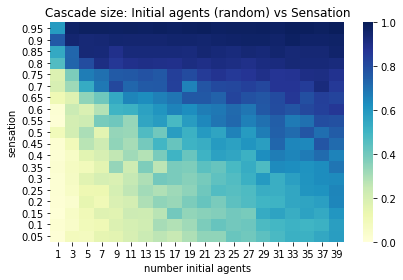

In [18]:
ax = sns.heatmap(
    cascade_size_random,
    cmap='YlGnBu',
    vmin=0.0,
    vmax=1.0,
    xticklabels=initial_agents,
    yticklabels=np.float32(sensation))
ax.invert_yaxis()

plt.title('Cascade size: Initial agents (random) vs Sensation')
plt.tight_layout()

##### Number of receivers

In [19]:
def get_agents_highest_out_degree(n, world):
    agents_sorted = {key: value for key, value in sorted(world.agents.items(), key=lambda item: -len(item[1].receivers))}
    return list(agents_sorted.keys())[:n]
    

def initial_agents_out_degree(initial_agents, sensations, num_agents=100, num_samples=10):
    df = pd.DataFrame(columns=['number initial agents', 'sensation', 'number active'])
    
    print(f'Starting simulation with {num_agents} agents (this may take some time...)')  
    for initial in initial_agents:
        for s in sensations:
            samples = []
            for _ in range(num_samples):
                name_news = 1
                news = {name_news: News(name_news, s, decay_parameter=0.0)}
                
                agent_names = list(range(num_agents))
                thresholds = np.random.random(num_agents)
                independences = np.random.random(num_agents)
                
                world = construct_world(agent_names, thresholds, independences, news)

                initial_agent_names = get_agents_highest_out_degree(initial, world)
                for agent_name in initial_agent_names:
                    world.agents[agent_name].states[name_news] = AgentState.ACTIVE
                
                number_active, _, _ = world.full_dynamics()
                samples.append(number_active / num_agents)
            
            df_active = pd.DataFrame([[initial, s, np.mean(samples)]], columns=df.columns)
            df = df.append(df_active, ignore_index=True)
            
    print('Simulation completed!!!')
    return df.astype(float).pivot('sensation', 'number initial agents', 'number active')

In [20]:
initial_agents = range(1, 40, 2)
sensation = np.linspace(0.05, 0.95, 19)

cascade_size_out_degree = initial_agents_out_degree(initial_agents, sensation, num_agents=100, num_samples=10)

Starting simulation with 100 agents (this may take some time...)
Simulation completed!!!


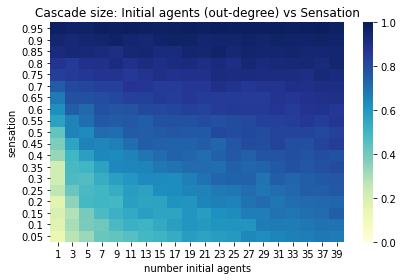

In [21]:
ax = sns.heatmap(
    cascade_size_out_degree,
    cmap='YlGnBu',
    vmin=0.0,
    vmax=1.0,
    xticklabels=initial_agents,
    yticklabels=np.float32(sensation))
ax.invert_yaxis()

plt.title('Cascade size: Initial agents (out-degree) vs Sensation')
plt.tight_layout()